    * PyMC3 is a new open source Probabilistic Programming framework written in Python
    * Uses Theano to compute gradients via automatic differentiation as well as compile probabilistic programs on-the-fly to C for increased speed
    * It features next-generation Markov chain Monte Carlo (MCMC, Hamliltonian Monte Carlo,) 
    * a self-tuning variant of Hamiltonian Monte Carlo 
    * works well on high dimensional and complex posterior distributions and allows many complex models to be fit without specialized knowledge about fitting algorithms
    * No-U-Turn Sampler (NUTS) and Hamiltonian Monte Carlo take advantage of gradient information from the likelihood to achieve much faster convergence than traditional sampling methods, especially
      for larger models.

### PyMC3 for solving general Bayesian statistical inference and prediction problems.
    * model definition,
    * model fitting,
    * posterior analysis 

In [6]:
# Installation 
#!conda install theano -y 
#!pip install pymc3
#!pip install patsy


# Generating the Data

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

# Visulizaing the Data

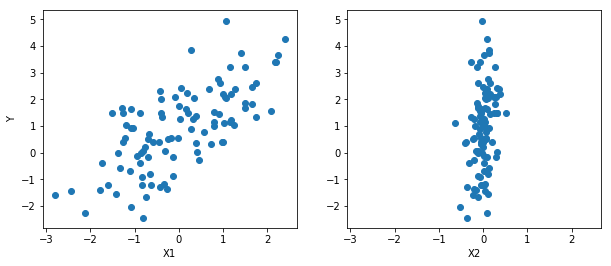

In [8]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True,figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); 
axes[0].set_xlabel('X1'); 
axes[1].set_xlabel('X2');

In [9]:
import pymc3 as pm


# Model Specification


In [10]:
import pymc3 as pm
basic_model = pm.Model()

# Context Manager of the Model 
with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [15]:
#help(pm.Normal)

# Model fitting
* 1) Maximum a posteriori methods (MAP) :using optimization methods
* 2) Sampling methods: computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods


### MAP

In [12]:
# By default, find_MAP uses the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm to find the maximum of the log-posterior but also 
# allows selection of other optimization algorithms from the scipy.optimize module.
map_estimate = pm.find_MAP(model=basic_model)
map_estimate


logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 58.23it/s] 


{'alpha': array(0.9066009314912589),
 'beta': array([ 0.94848596,  2.60711845]),
 'sigma': array(0.9629885768973849),
 'sigma_log__': array(-0.037713729250850515)}

In [13]:
from scipy import optimize

map_estimate = pm.find_MAP(model=basic_model, fmin=optimize.fmin_powell)

map_estimate

/home/ibrahim/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:91: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -149.47:   4%|▎         | 176/5000 [00:00<00:01, 4144.03it/s]

Optimization terminated successfully.
         Current function value: 148.984564
         Iterations: 4
         Function evaluations: 176


{'alpha': array(0.9090796395146041),
 'beta': array([ 0.9514399 ,  2.61452795]),
 'sigma': array(0.9656806239373911),
 'sigma_log__': array(-0.0349221164775208)}

In [14]:
# Most techniques for finding the MAP estimate also only find a local optimum (which is often good enough), 
# but can fail badly for multimodal posteriors if the different modes are meaningfully different.

### MCMC

* Cons: No associated estimate of uncertainty produced with the MAP estimate

In [16]:
with basic_model:

    # obtain starting values via MAP
    start = pm.find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step, start=start)

/home/ibrahim/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:91: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -149.47:   4%|▎         | 176/5000 [00:00<00:01, 4559.90it/s]


Optimization terminated successfully.
         Current function value: 148.984564
         Iterations: 4
         Function evaluations: 176


100%|██████████| 5500/5500 [00:10<00:00, 500.78it/s]


(array([    7.,    71.,   310.,   948.,  1529.,  1345.,   622.,   143.,
           21.,     4.]),
 array([ 0.52934392,  0.60931999,  0.68929606,  0.76927212,  0.84924819,
         0.92922426,  1.00920033,  1.08917639,  1.16915246,  1.24912853,
         1.3291046 ]),
 <a list of 10 Patch objects>)

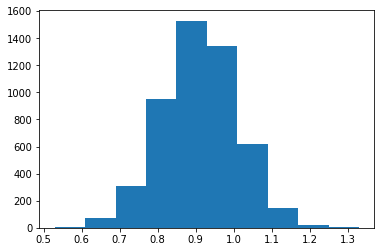

In [18]:
plt.hist(trace['alpha'])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.94670985,  1.10332667,  1.25994348,  1.41656029,  1.5731771 ,
         1.72979391,  1.88641072,  2.04302753,  2.19964434,  2.35626116,
         2.51287797]),
 <a list of 10 Patch objects>)

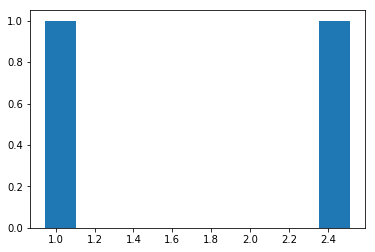

In [21]:
plt.hist(trace['beta'][1])

# Posterior analysis

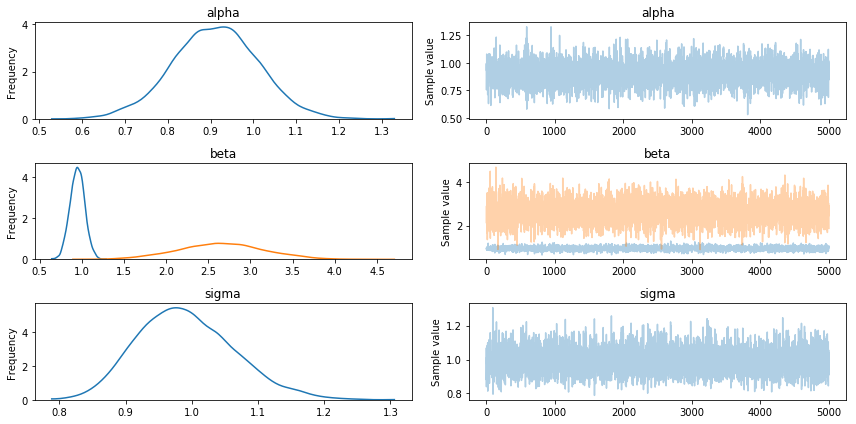

In [25]:
_ = pm.traceplot(trace)
